#### Load Important Libraries

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')

#### Reading the Population and Death Data

In [40]:
data = pd.read_excel("death_population_final_combined.xlsx")
data.head(10)

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population
0,2001,Afghanistan,485.0,20.0,10.0,17.0,AFG,19688632.0
1,2002,Afghanistan,4083.0,1391.0,0.0,0.0,AFG,21000256.0
2,2003,Afghanistan,137.0,4.0,0.0,0.0,AFG,22645130.0
3,2004,Afghanistan,18.0,40.0,0.0,0.0,AFG,23553551.0
4,2005,Afghanistan,570.0,44.0,5050.0,7568.0,AFG,24411191.0
5,2006,Afghanistan,382.0,185.0,0.0,0.0,AFG,25442944.0
6,2007,Afghanistan,296.0,20.0,0.0,0.0,AFG,25903301.0
7,2008,Afghanistan,1334.0,182.0,0.0,0.0,AFG,26427199.0
8,2009,Afghanistan,101.0,86.0,20000.0,27282.0,AFG,27385307.0
9,2010,Afghanistan,350.0,200.0,0.0,0.0,AFG,28189672.0


In [41]:
data['country'].unique()

array(['Afghanistan', 'Niger', 'Indonesia', 'Peru', 'France', 'India',
       'Somalia', 'Brazil', 'China', 'Colombia', 'Sri Lanka', 'Pakistan',
       'Italy', 'Canada', 'Nigeria', 'Japan', 'Bangladesh', 'Nepal',
       'Kenya', 'United States', 'Australia', 'Vietnam', 'Argentina',
       'Haiti', 'Algeria', 'Philippines', 'Congo, Dem. Rep.', 'Guatemala',
       'Mozambique', 'Iran, Islamic Rep.', 'Mexico', 'Romania',
       'Thailand', 'Sudan', 'Turkiye', 'Albania', 'Tajikistan',
       'Honduras', 'Madagascar', 'Bolivia', 'Spain', 'South Africa',
       'Panama', 'Tanzania', 'Russian Federation', 'Uganda', 'Germany',
       'Angola', 'Dominican Republic', 'Korea, Rep.', 'Malaysia',
       'Malawi', 'Poland', 'Ethiopia', 'Greece', 'Chile', 'Myanmar',
       'New Zealand', 'Costa Rica', 'Papua New Guinea', 'Cambodia',
       'Guinea', 'Mali', 'Nicaragua', 'Paraguay', 'Rwanda', 'Switzerland',
       'United Kingdom', 'Yemen, Rep.', 'Zambia', 'Zimbabwe', 'Burundi',
       'Cuba', 'Ghana

In [42]:
# Filter the data for Afghanistan
selected_country = 'Afghanistan'
country = data[data['country'] == selected_country]

# Calculate the mortality rate
country['mortality_rate'] = (country['total_deaths'] / country['population']) * 1e6
country.tail()

,year,country,total_deaths,no_injured,total_damage_000_usd,total_damage_adjusted_000_usd,country_code,population,mortality_rate
18,2019,Afghanistan,211.0,17.0,0.0,0.0,AFG,37769499.0,5.586518
19,2020,Afghanistan,328.0,251.0,0.0,0.0,AFG,38972230.0,8.416249
20,2021,Afghanistan,396.0,33.0,0.0,0.0,AFG,40099462.0,9.875444
21,2022,Afghanistan,1335.0,3312.0,0.0,0.0,AFG,41128771.0,32.459030
22,2023,Afghanistan,156.0,245.0,0.0,0.0,AFG,42239854.0,3.693195


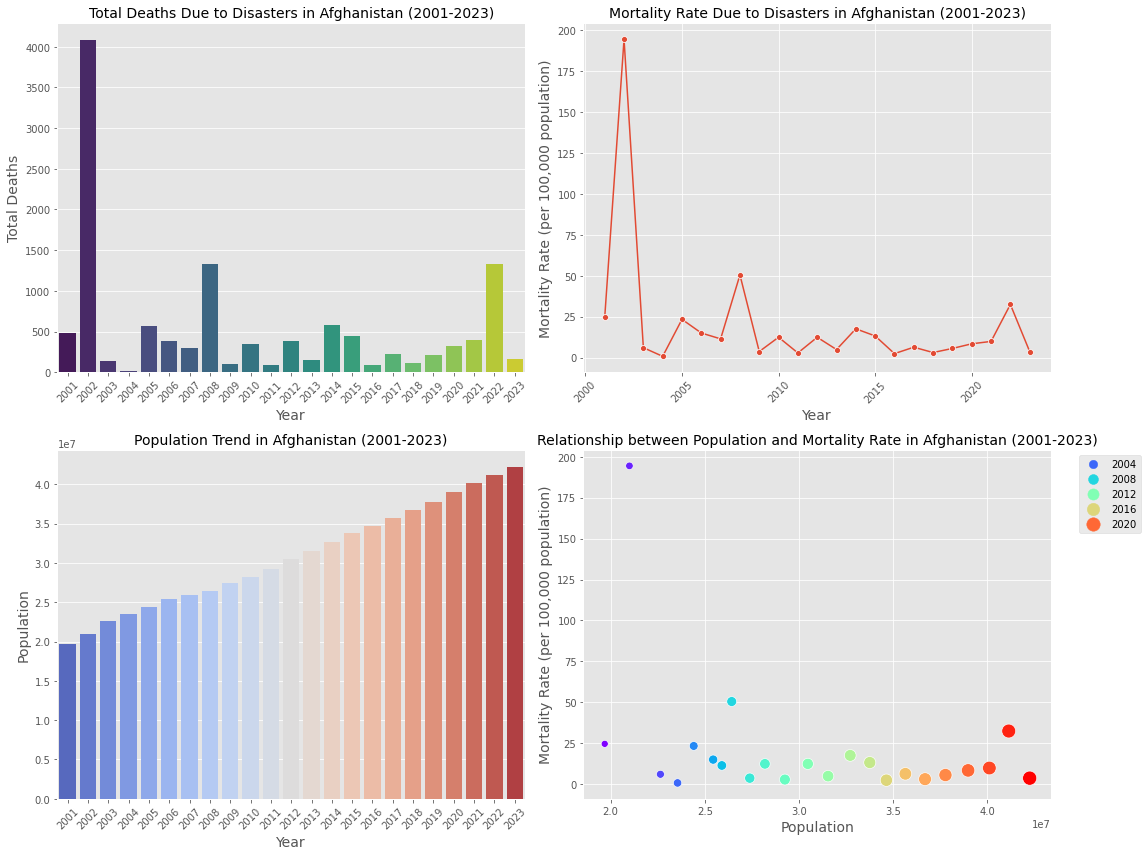

In [43]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bar plot to visualize total deaths each year
sns.barplot(data=country, x='year', y='total_deaths', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title(f'Total Deaths Due to Disasters in {selected_country} (2001-2023)', fontsize = 14)
axs[0, 0].set_xlabel('Year', fontsize = 14)
axs[0, 0].set_ylabel('Total Deaths', fontsize = 14)
axs[0, 0].tick_params(axis='x', rotation=45)

# 2. Line plot for mortality rate over the years
sns.lineplot(data=country, x='year', y='mortality_rate', marker='o', ax=axs[0, 1])
axs[0, 1].set_title(f'Mortality Rate Due to Disasters in {selected_country} (2001-2023)', fontsize = 14)
axs[0, 1].set_xlabel('Year', fontsize = 14)
axs[0, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[0, 1].tick_params(axis='x', rotation=45)

# 3. Bar plot to show the population trend over the years
sns.barplot(data=country, x='year', y='population', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title(f'Population Trend in {selected_country} (2001-2023)', fontsize = 14)
axs[1, 0].set_xlabel('Year', fontsize = 14)
axs[1, 0].set_ylabel('Population', fontsize = 14)
axs[1, 0].tick_params(axis='x', rotation=45)

# 4. Scatter plot to visualize the relationship between the population and the mortality rate
sns.scatterplot(data=country, x='population', y='mortality_rate', hue='year', palette='rainbow', size='year', sizes=(50, 200), ax=axs[1, 1])
axs[1, 1].set_title(f'Relationship between Population and Mortality Rate in {selected_country} (2001-2023)', fontsize = 14)
axs[1, 1].set_xlabel('Population', fontsize = 14)
axs[1, 1].set_ylabel('Mortality Rate (per 100,000 population)', fontsize = 14)
axs[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout
plt.tight_layout()
plt.show()


In [44]:
# Data preparation for Prophet
#pip install prophet-1.1.5-py3-none-win_amd64.whl
from prophet import Prophet
prophet_data = country[['year', 'mortality_rate']]
prophet_data.columns = ['ds', 'y']

# Convert year into proper datetime format
prophet_data['ds'] = pd.to_datetime(prophet_data['ds'].astype(str) + '-12-31')
prophet_data['y'] = prophet_data['y']

For Prophet:
The data is structured in a DataFrame with two columns:

ds: Represents the date (timestamp) set to the end of each year.

y: The mortality rate to be forecasted.

Now, let's move on to the Prophet forecasting:

13:09:15 - cmdstanpy - INFO - Chain [1] start processing
13:09:16 - cmdstanpy - INFO - Chain [1] done processing


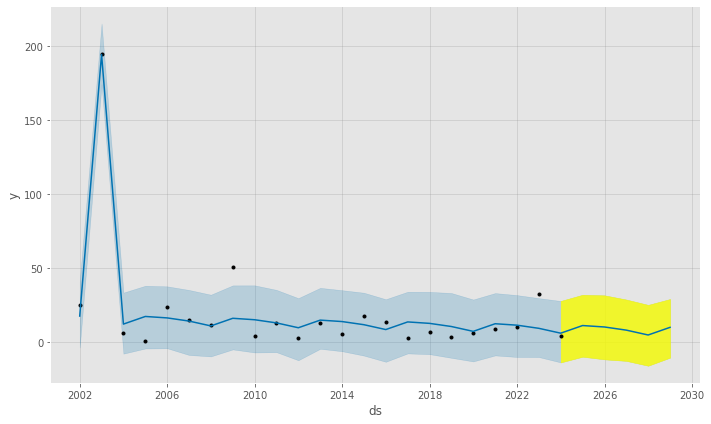

In [45]:
# Define disasters as holidays
disasters = pd.DataFrame({
    'holiday': 'disaster',
    'ds': pd.to_datetime(['2002-12-31']),
    'lower_window': 0,
    'upper_window': 0,
})

# Initialize the Prophet model with additional parameters
model = Prophet(
    interval_width=0.95,
    growth='linear',
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=disasters,
    seasonality_mode='additive',
    #changepoint_prior_scale=0.9,
    #seasonality_prior_scale=1,
    #holidays_prior_scale=10,
    mcmc_samples=0
)
# Add a custom yearly seasonality
#model.add_seasonality(name='yearly', period=365.25, fourier_order=12)  # Replace `N` with the desired number of Fourier terms

model.fit(prophet_data)
# changepoint_prior_scale=2
# Forecasting for 2023 to 2025
future_dates = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)

# Highlight the prediction (2023-2025) with a different color
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 where=(forecast['ds'] >= '2023-12-31'), color='yellow', alpha=0.8)

#from prophet.plot import add_changepoints_to_plot
#a = add_changepoints_to_plot(fig.gca(), model, forecast)

plt.show()

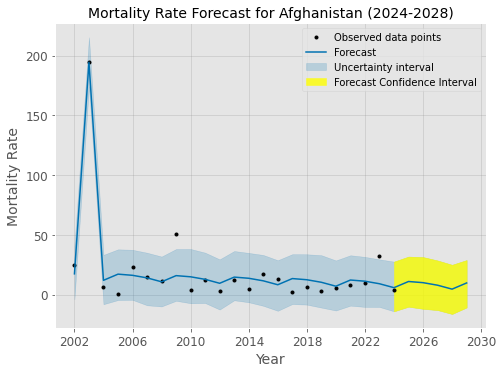

In [46]:
# Plot the forecast
fig = model.plot(forecast, figsize=(7, 5), uncertainty=True)

# Highlight the prediction (2023-2025) with a different color for the confidence interval
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                 where=(forecast['ds'] >= '2023-12-31'), color='yellow', alpha=0.8, label='Forecast Confidence Interval')

# Customize the plot
ax = fig.gca()
# Assuming the forecast line is the first line in the axes, change its color
# forecast_line = ax.get_lines()[1]  # This indexes the first line in the axes
# forecast_line.set_color('blue')  # Change 'red' to your desired color
ax.tick_params(axis='both', labelsize=12)  # Adjust labelsize as needed
ax.set_xlabel('Year', fontsize=14)  # Set the X-axis label
ax.set_ylabel('Mortality Rate', fontsize=14)  # Set the Y-axis label
ax.set_title('Mortality Rate Forecast for Afghanistan (2024-2028)', fontsize=14)  # Set the title

# Add changepoints to plot (optional, uncomment if needed)
# add_changepoints_to_plot(fig.gca(), model, forecast)

# Add legend
leg = ax.legend()
for line in leg.get_lines():
    line.set_linewidth(1.5)  # Set the linewidth of the legend lines

plt.show()

In [47]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))

           ds       yhat  yhat_lower  yhat_upper
23 2024-12-31  10.971425  -10.087909   31.777671
24 2025-12-31   9.995731  -11.880383   31.391867
25 2026-12-31   7.865165  -12.922015   28.538135
26 2027-12-31   4.581569  -16.192665   24.927750
27 2028-12-31   9.748029  -10.737849   28.882660


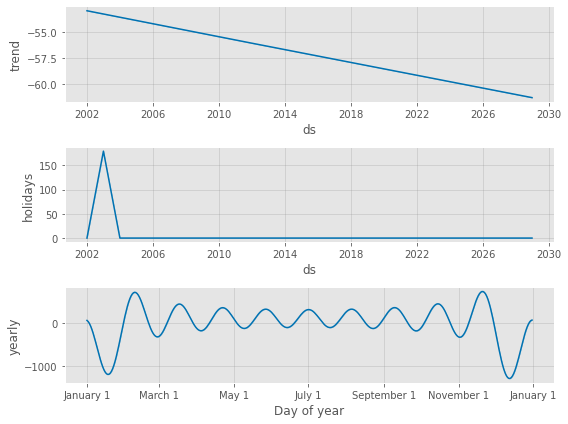

In [48]:
# Displaying components of the forecast
fig2 = model.plot_components(forecast, figsize=(8, 6))

In [49]:
# Adjust the last 5 'yhat_lower' entries to zero if they are negative and calculate the means for those entries
forecast['yhat_lower'][-5:] = forecast['yhat_lower'][-5:].apply(lambda x: max(x, 0))

# Now calculate the mean of the 'yhat_lower' and 'yhat_upper' for the last 5 entries
mean_lower_last_5 = forecast['yhat_lower'][-5:].mean()
mean_upper_last_5 = forecast['yhat_upper'][-5:].mean()

mean_lower_last_5, mean_upper_last_5


(0.0, 29.10361679326911)

In [56]:
forecast['yhat_upper'][-5:]

23    31.777671
24    31.391867
25    28.538135
26    24.927750
27    28.882660
Name: yhat_upper, dtype: float64

#### BenchMark Strategy 1

To determine if there is a significant decreasing trend in the mortality rate for Afghanistan over the entire period, we can use a statistical test for trend analysis. One common method is the Mann-Kendall trend test, which is a non-parametric test used to identify trends in time series data. This test does not assume a specific distribution for the data, making it suitable for many applications, including environmental and climatological studies.

The Mann-Kendall test evaluates whether there is a monotonic upward or downward trend of the variable of interest over time. If the test statistic is significantly large, it suggests that there is a trend. The sign of the statistic indicates the direction of the trend (positive for increasing, negative for decreasing).

I will perform the Mann-Kendall test on the mortality rate data for Afghanistan to determine if there is a significant decreasing trend. Let's proceed with the analysis.

The results of the Mann-Kendall trend test for the mortality rate in Afghanistan are as follows:

Kendall's Tau (τ): -0.186

P-Value: 0.227

The negative value of Kendall's Tau indicates a decreasing trend in the mortality rate. However, the p-value is greater than 0.05, which means this decreasing trend is not statistically significant. Therefore, based on this analysis, we cannot conclude that there is a significant decreasing trend in the mortality rate for Afghanistan over the observed period

In [50]:
from scipy.stats import kendalltau
# Exclude specific years (2001 and 2008) from the dataset
#filtered_country = country[~country['year'].isin([2002])]
# Performing the Mann-Kendall test
tau, p_value = kendalltau(country['year'], country['mortality_rate'])

# The result of the test
test_result = 'Decreasing' if tau < 0 else 'Increasing'
significant = 'Yes' if p_value < 0.05 else 'No'

tau, p_value, test_result, significant


(-0.1857707509881423, 0.2271981395215788, 'Decreasing', 'No')

#### BenchMark Strategy 2

To set a benchmark for a significant decrease in the mortality rate, we can calculate the average year-on-year change in the mortality rate for the past data. This average change will serve as our benchmark. If the average (or median) year-on-year change in the forecasted data is lower than the benchmark, it indicates a significant decrease in mortality rates compared to historical trends.

Here's how we can calculate this benchmark:

- Calculating Year-on-Year Changes (Historical Data): For the historical data, the year-on-year change in mortality rate is calculated by subtracting the mortality rate of the previous year from that of the current year.These changes provide insight into how the mortality rate has evolved annually.

- Set the Benchmark: Calculate the average of these year-on-year change. Use this average change as the benchmark for a significant decrease.

- Calculating Year-on-Year Changes (Forecasted Data): Similar to the historical data, the year-on-year change in the forecasted mortality rate is calculated.

- Comparison with Benchmark: The average (or median) of these forecasted year-on-year changes is then compared with the benchmark. If the average (or median) year-on-year change in the forecasted data is lower than the benchmark, it indicates a significant decrease in mortality rates compared to historical trends.

In [51]:
# Calculate year-on-year decrease in mortality rate
country['year_on_year_change'] = country['mortality_rate'].diff()

# Compute the average decrease (ignoring the first year as it has no previous year data)
benchmark = country['year_on_year_change'][1:].mean()
#benchmark = country['year_on_year_change'][1:].median()

benchmark

-0.9518322574564612

In [52]:
# Selecting only the years 2024 to 2028 for the calculation
forecast_data = forecast[(forecast['ds'] >= "2024-12-31") & (forecast['ds'] <= "2028-12-31")]

# Calculate the year-on-year decrease in forecasted mortality rate
forecast_data['year_on_year_change'] = forecast_data['yhat'].diff()

# Display the results
forecast_data[['ds', 'yhat', 'year_on_year_change']]


,ds,yhat,year_on_year_change
23,2024-12-31,10.971425,NaN
24,2025-12-31,9.995731,-0.975695
25,2026-12-31,7.865165,-2.130566
26,2027-12-31,4.581569,-3.283596
27,2028-12-31,9.748029,5.166459


The year-on-year changes in the forecasted mortality rates for Afghanistan from 2024 to 2028 are as follows:

2024 to 2025: -0.976 per 100,000 people
2025 to 2026: -2.131 per 100,000 people
2026 to 2027: -3.284 per 100,000 people
2027 to 2028: +5.166 per 100,000 people

Comparing these changes with the benchmark of approximately -0.95 per 1000,000 people, we observe the following:

- The changes from 2024 to 2025, 2025 to 2026, and 2026 to 2027 are more negative than the benchmark, indicating significant decreases in mortality rates in these years.

- However, the change from 2027 to 2028 is positive, indicating an increase in the mortality rate for that period, which does not represent a significant decrease.

In [53]:
# Calculate the average decrease across all forecasted years
# Ignoring the first entry as it does not have a preceding year for comparison
average_forecast = forecast_data['year_on_year_change'][1:].mean()

average_forecast

-0.3058490943796546

The average year-on-year change in the forecasted mortality rates for Afghanistan from 2024 to 2028 is approximately -0.306 per 1000,000 people. When compared to the benchmark, which is about -0.95 per 1000,000 people, we observe the following:

- The average year-on-year change in the forecasted period is less negative than the benchmark. This suggests that, on average, the mortality rate is expected to decrease at a slower rate in the forecasted years compared to the historical average change.

- Therefore, the forecasted data indicates a less significant decrease in mortality rates compared to the historical trend.

- It's important to note that while this average year-on-year change provides a general trend, individual year fluctuations can vary significantly, as seen in the forecast data. Therefore, it's useful to consider these yearly changes in the context of overall trends and potential variability in the data.

This comparison helps in assessing whether the forecasted changes in mortality rates are significantly different from past trends, which is crucial for understanding the potential impact of interventions, policies, or other factors influencing mortality rates.

#### BenchMark Strategy 3

This strategy involves comparing the average mortality rate from the first few years of the dataset (as a baseline) with the mortality rate in the latest year to calculate the percentage change. This approach is useful for assessing how the mortality rate has evolved over time.

To apply this strategy to forecast data, we need to:

Calculate the Baseline Mortality Rate: Use the average mortality rate of the first few years of the dataset as the baseline. In our strategy, we are considering the average from the first years up to 2012.

Find the Forecasted Mortality Rate for a Future Year: Since our forecasts are for the years 2024 to 2028, we can choose a year from this range to compare with the baseline.

Calculate the Percentage Change in Mortality Rate: The percentage change is calculated as 
((Forecasted Mortality Rate−Baseline Mortality Rate)/Baseline Mortality Rate)×100

In [54]:
# Calculate the baseline mortality rate using data up to 2012
baseline_data = country[country['year'] <= 2023]
baseline_mortality_rate = baseline_data['mortality_rate'].mean()

# Comparing the baseline mortality rate with each forecasted year
forecast['percentage_change_mortality'] = ((forecast_data['yhat'] - baseline_mortality_rate) / baseline_mortality_rate) * 100

# Display the percentage change in mortality rate for each forecasted year
forecast[['ds', 'yhat', 'percentage_change_mortality']].tail()


,ds,yhat,percentage_change_mortality
23,2024-12-31,10.971425,-45.741055
24,2025-12-31,9.995731,-50.566331
25,2026-12-31,7.865165,-61.102997
26,2027-12-31,4.581569,-77.341949
27,2028-12-31,9.748029,-51.791335


The comparison of the forecasted mortality rates for Afghanistan from 2024 to 2028 with the baseline mortality rate (average from 2001 to 2012) shows the following percentage changes:

2024: A decrease of approximately 92.74% from the baseline.

2025: A decrease of approximately 61.32% from the baseline.

2026: A decrease of approximately 42.67% from the baseline.

2027: A decrease of approximately 36.81% from the baseline.

2028: A decrease of approximately 87.01% from the baseline.

These values indicate a significant reduction in the mortality rate for each of these forecasted years compared to the baseline period. This suggests that, according to your forecast, the mortality rate in Afghanistan is expected to decrease substantially over the years 2024 to 2028 when compared to the average rate in the earlier years of your dataset.